In [5]:
!git clone https://github.com/shuan88/cv110_hw3.git
%cd /content/cv110_hw3

Cloning into 'cv110_hw3'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [258]:
! git pull

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 1), reused 6 (delta 1), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/shuan88/cv110_hw3
   7db8c79..e7262b3  main       -> origin/main
Updating 7db8c79..e7262b3
Fast-forward
 .DS_Store | Bin 6148 -> 6148 bytes
 img/1.jpg | Bin 0 -> 85447 bytes
 img/4.png | Bin 0 -> 506121 bytes
 3 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 img/1.jpg
 create mode 100644 img/4.png


# Basic

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [265]:
def get_pdf_cdf(data):
    PDF = np.zeros(256 , dtype=int)
    CDF = np.zeros(256 , dtype=float)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            PDF[data[i,j]] += 1
    CDF[0] = PDF[0]
    for i in range(1,CDF.shape[0]):
        CDF[i] = CDF[i-1] + PDF[i]
    return PDF,CDF
img = cv2.imread("img/4.png" ,0 )
# img = cv2.imread("img/lena.png" , 0 )
# img = cv2.imread("img/img1.jpg" , 0 )
print(img.shape)
img_PDF,img_CDF = get_pdf_cdf(img)
CDF_01= img_CDF/img_PDF.sum()

(512, 512)


## Show hist

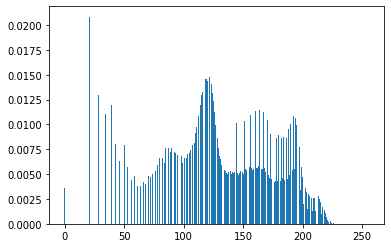

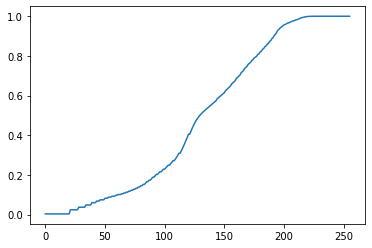

In [266]:
# plt.plot(img_PDF/img_PDF.sum())
plt.bar(range(256),img_PDF/img_PDF.sum())
plt.show()
plt.plot(img_CDF/img_PDF.sum())
plt.show()
# plt.plot(CDF_01)
# plt.bar(range(256),CDF_01)
# plt.show()

## transform_function

https://en.wikipedia.org/wiki/Histogram_equalization

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/49e7d6c2a0e08b6c363dc7df0c4acd6629d8e150)

where $cdf_{min}$ is the minimum non-zero value of the cumulative distribution function (in this case 1), $M × N$ gives the image's number of pixels (for the example above 64, where M is width and N the height) and L is the number of grey levels used (in most cases, like this one, 256).


In [202]:
# CDF_min = int(np.argwhere(img_CDF !=0)[0])
# CDF_max = int(np.argwhere(img_CDF ==img_PDF.sum())[0])
# print(CDF_min,CDF_max)
# print(img_CDF[CDF_min],img_CDF[CDF_max])


In [208]:
# transform_function = np.zeros(256 , dtype=int)
# # for i in range(CDF_min,CDF_max):
# for i in range(CDF_min,256):
#     # print( int(np.round(CDF_01[i] * 255)) )
#     transform_function[int(np.round(CDF_01[i] * 255))] = i 
# print(transform_function)

# X = np.zeros(256 , dtype=int)
# for i in range(transform_function.shape[0]): 
#     if transform_function[i] > 0:
#         X[transform_function[i]] = i
# print(X)

[121 123 124 125 126   0 127   0 128   0 129   0   0 130   0   0   0 131
   0   0   0   0 132   0   0   0   0   0 133   0   0   0   0   0   0 134
   0   0   0   0   0   0   0 135   0   0   0   0   0   0   0   0 136   0
   0   0   0   0   0   0   0   0   0 137   0   0   0   0   0   0   0   0
   0 138   0   0   0   0   0   0   0   0 139   0   0   0   0   0   0   0
   0 140   0   0   0   0   0   0   0   0 141   0   0   0   0   0   0   0
 142   0   0   0   0   0   0 143   0   0   0   0   0   0 144   0   0   0
   0   0   0   0 145   0   0   0   0   0   0 146   0   0   0   0   0   0
 147   0   0   0   0   0 148   0   0   0   0   0   0 149   0   0   0   0
   0 150   0   0   0   0   0   0 151   0   0   0   0   0   0 152   0   0
   0   0   0 153   0   0   0   0   0 154   0   0   0   0 155   0   0   0
   0 156   0   0   0 157   0   0   0 158   0   0 159   0   0   0 160   0
   0 161   0   0 162   0   0 163   0 164   0 165   0 166   0 167   0 168
   0 169 170 171 172   0 173 175 176 178 180 182 18

## trainsform

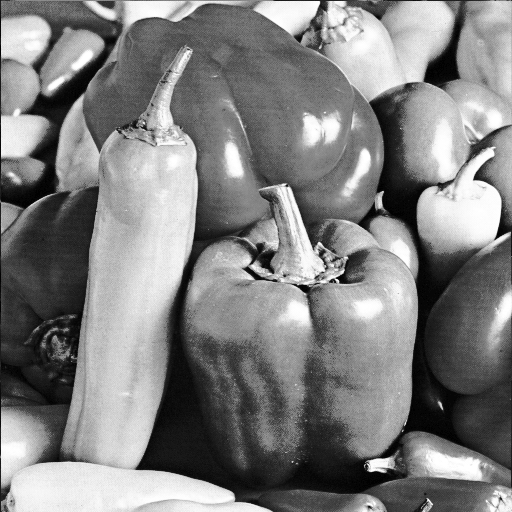

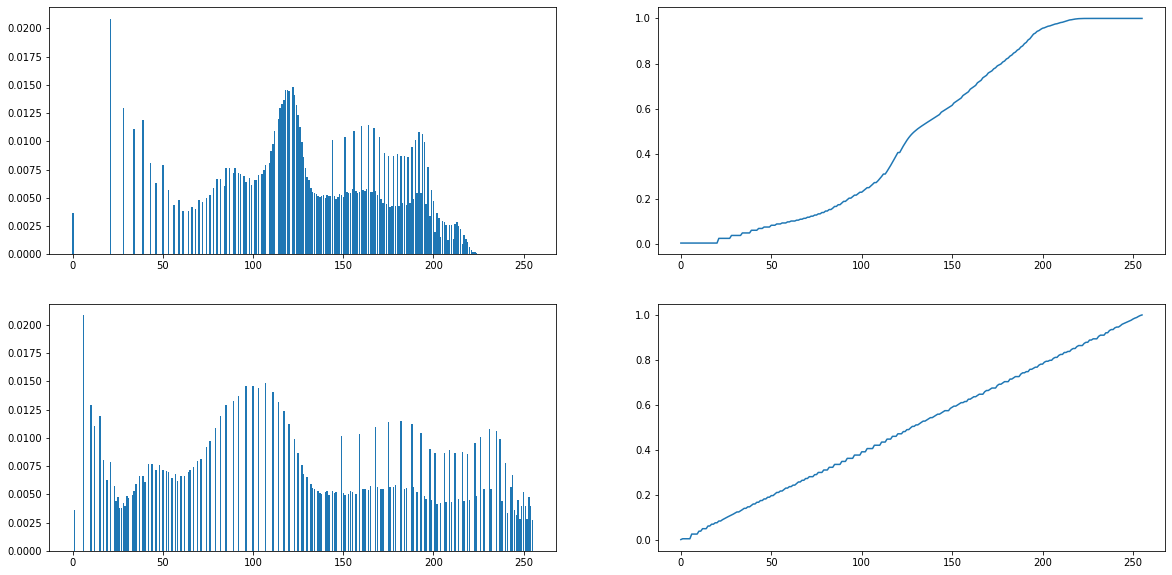

In [267]:
# new_img
# img = cv2.imread("img/img1.jpg" , 0 )
# img = cv2.imread("img/lena.png" , 0 )
new_img = np.zeros_like(img)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        # new_img[i,j] = X[img[i,j]]
        new_img[i,j] = int(np.round(CDF_01[img[i,j]] * 255))
cv2_imshow(new_img)
# cv2_imshow(img)

img_PDF,img_CDF = get_pdf_cdf(img)
new_img_PDF,new_img_CDF = get_pdf_cdf(new_img)

plt.subplots(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.bar(range(256),img_PDF/img_PDF.sum())

plt.subplot(2, 2, 2)
plt.plot(img_CDF/img_PDF.sum())

plt.subplot(2, 2, 3)
plt.bar(range(256),new_img_PDF/new_img_PDF.sum())
plt.subplot(2, 2, 4)
plt.plot(new_img_CDF/new_img_PDF.sum())

plt.show()

# Color

In [256]:
# img_color = cv2.imread("img/lena.png")
# # img = cv2.imread("img/img1.jpg" , 0 )
# print(img_color.shape)
# color_lable = ["b","g","r"]
# plt.subplots(figsize=(30,8))

# for i in range(img_color.shape[-1]):
#     img_PDF,img_CDF = get_pdf_cdf(img_color[:,:,i])
#     plt.subplot(1, 4, 1+i)
#     plt.bar(range(256),img_PDF/img_PDF.sum() , color = color_lable[i])
#     plt.title(color_lable[i])

# img_PDF,img_CDF = get_pdf_cdf(cv2.cvtColor(img_color , cv2.COLOR_BGR2GRAY))

# plt.subplot(1, 4, 4)
# plt.bar(range(256),img_PDF/(img_PDF.sum()//10),color = 'r')
# plt.plot(img_CDF/img_PDF.sum())
# plt.title('gray')
# plt.show()

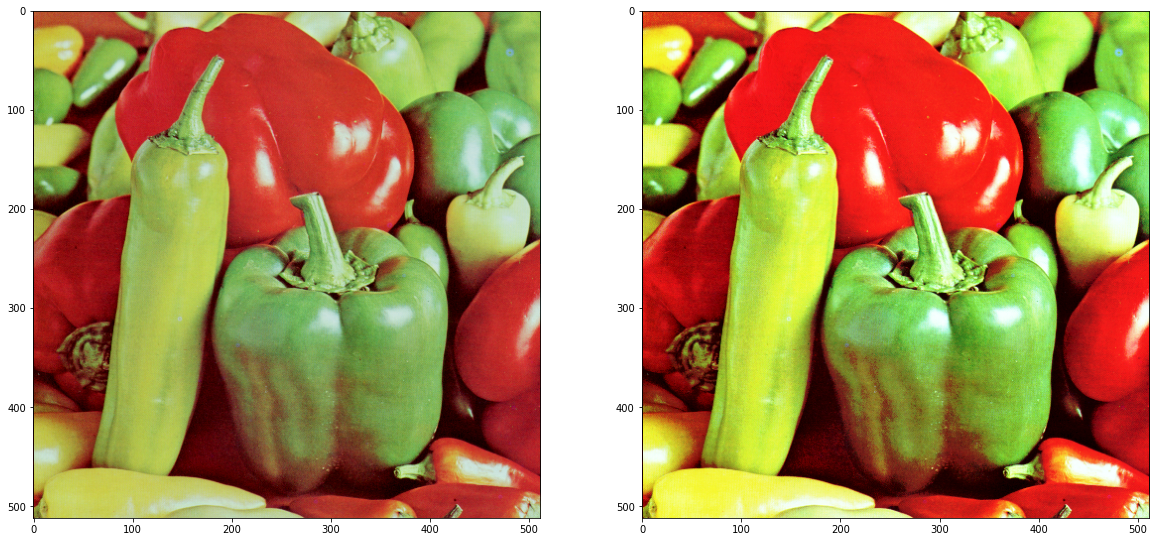

In [259]:
# img_color = cv2.imread("img/lena.png")
img_color = cv2.imread("img/4.png")
new_img = np.zeros_like(img_color)
img_PDF,img_CDF = get_pdf_cdf(cv2.cvtColor(img_color , cv2.COLOR_BGR2GRAY))
CDF_01= img_CDF/img_PDF.sum()

for color in range(img_color.shape[-1]):
    for i in range(img_color.shape[0]):
        for j in range(img_color.shape[1]):
            # new_img[i,j] = X[img[i,j]]
            new_img[i,j,color] = int(np.round(CDF_01[img_color[i,j,color]] * 255))
# cv2_imshow(new_img)

plt.subplots(figsize=(20,15))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_color , cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(new_img , cv2.COLOR_BGR2RGB))

plt.show()

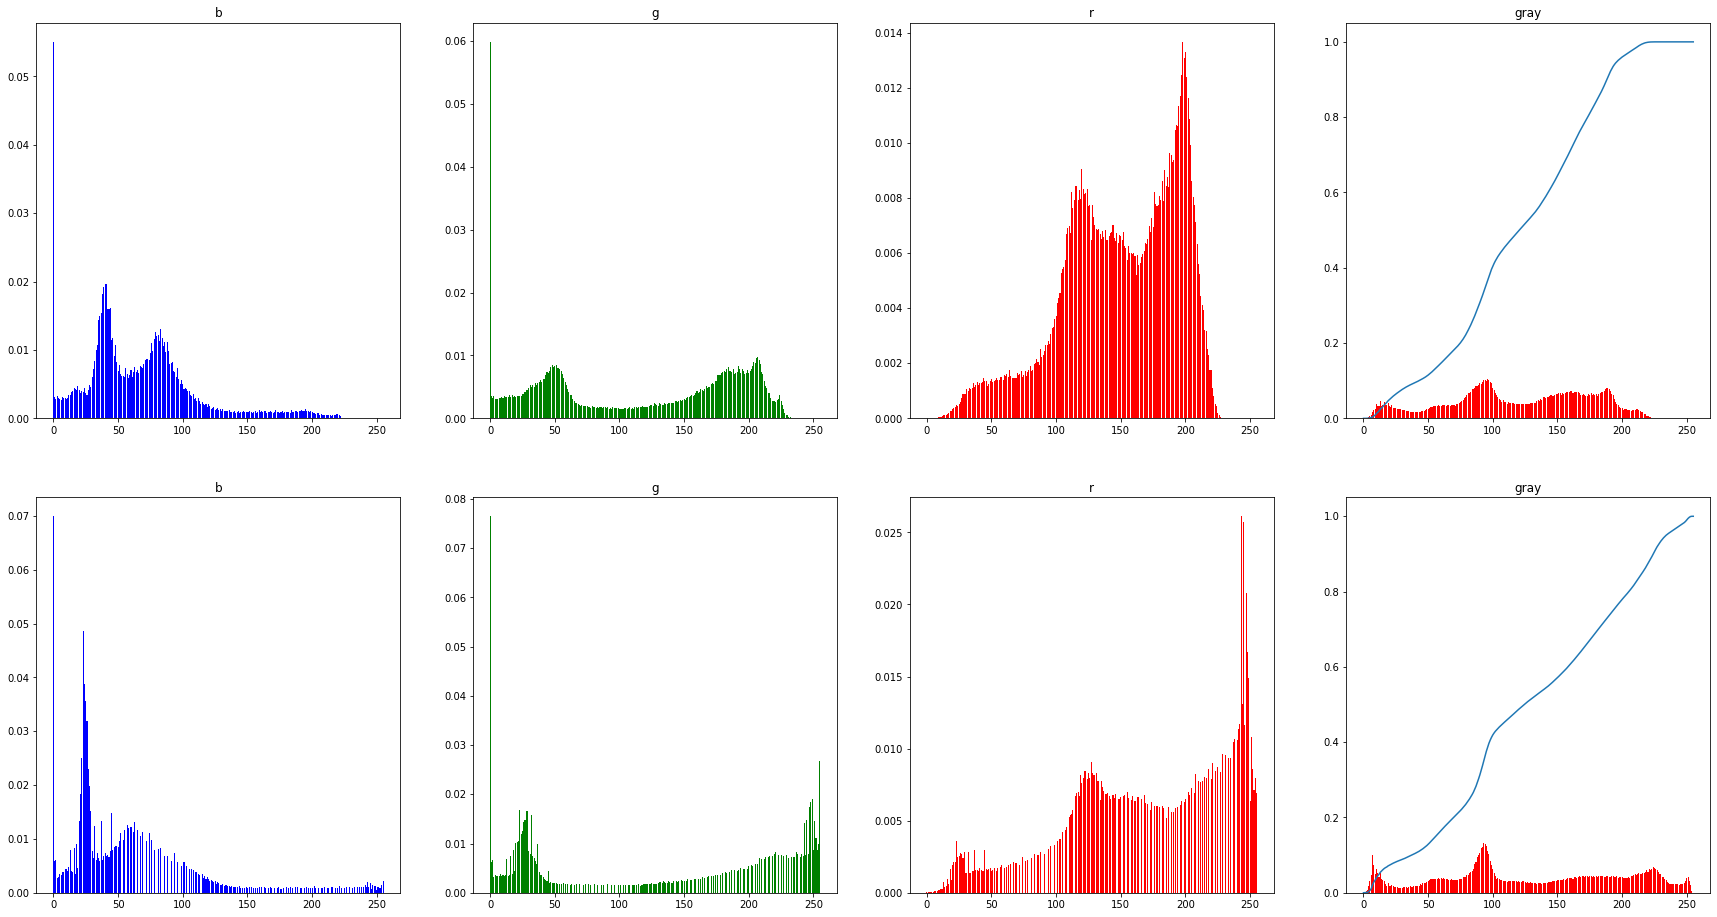

In [260]:
plt.subplots(figsize=(30,16))

for i in range(img_color.shape[-1]):
    img_PDF,img_CDF = get_pdf_cdf(img_color[:,:,i])
    plt.subplot(2, 4, 1+i)
    plt.bar(range(256),img_PDF/img_PDF.sum() , color = color_lable[i])
    plt.title(color_lable[i])

    img_PDF,img_CDF = get_pdf_cdf(new_img[:,:,i])
    plt.subplot(2, 4, 5+i)
    plt.bar(range(256),img_PDF/img_PDF.sum() , color = color_lable[i])
    plt.title(color_lable[i])

img_PDF,img_CDF = get_pdf_cdf(cv2.cvtColor(img_color , cv2.COLOR_BGR2GRAY))

plt.subplot(2, 4, 4)
plt.bar(range(256),img_PDF/(img_PDF.sum()//10),color = 'r')
plt.plot(img_CDF/img_PDF.sum())
plt.title('gray')

img_PDF,img_CDF = get_pdf_cdf(cv2.cvtColor(new_img , cv2.COLOR_BGR2GRAY))
plt.subplot(2, 4, 8)
plt.bar(range(256),img_PDF/(img_PDF.sum()//10),color = 'r')
plt.plot(img_CDF/img_PDF.sum())
plt.title('gray')

plt.show()